In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
im = plt.imread('Zeyu W.jpg')

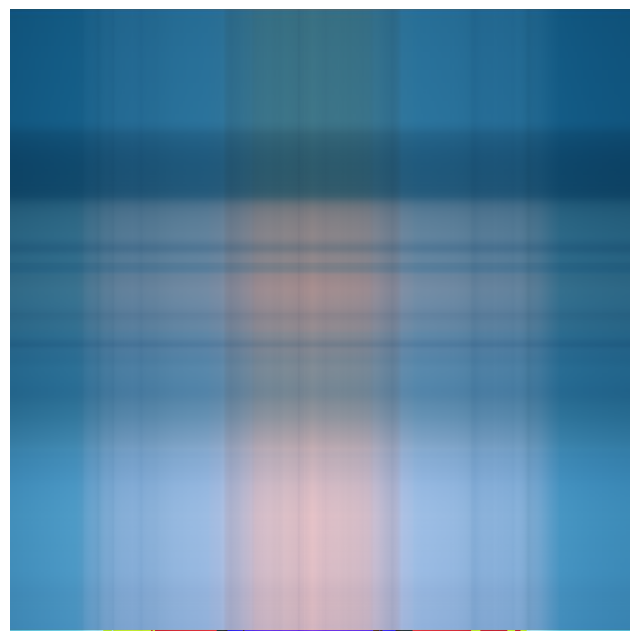

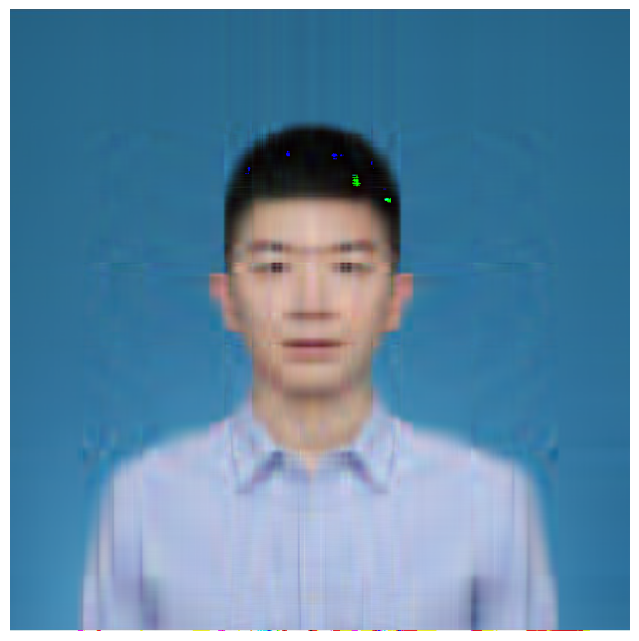

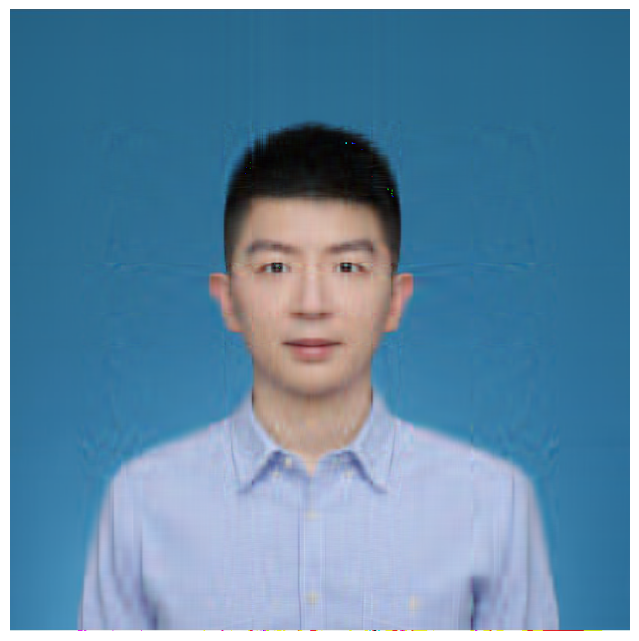

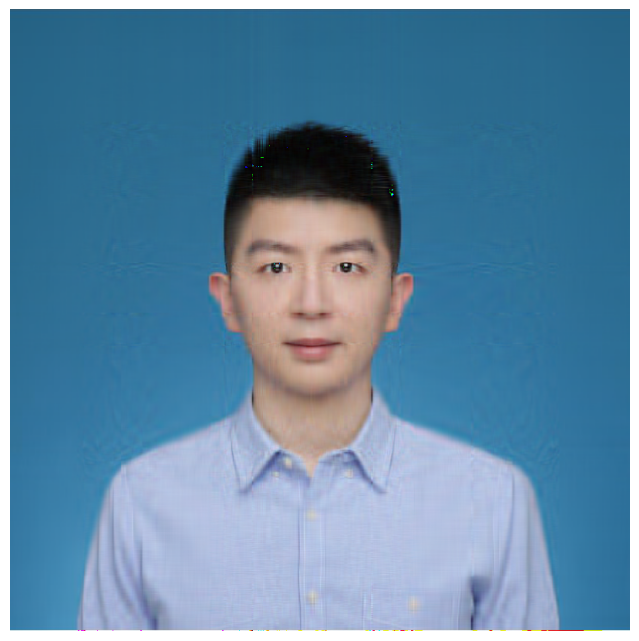

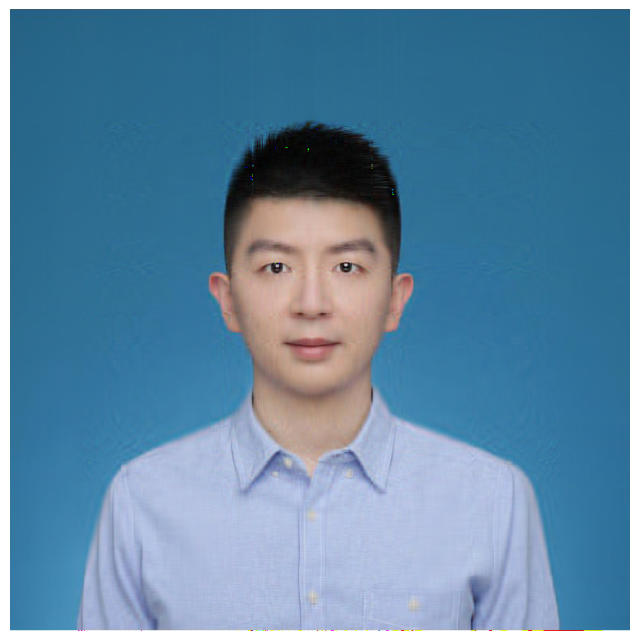

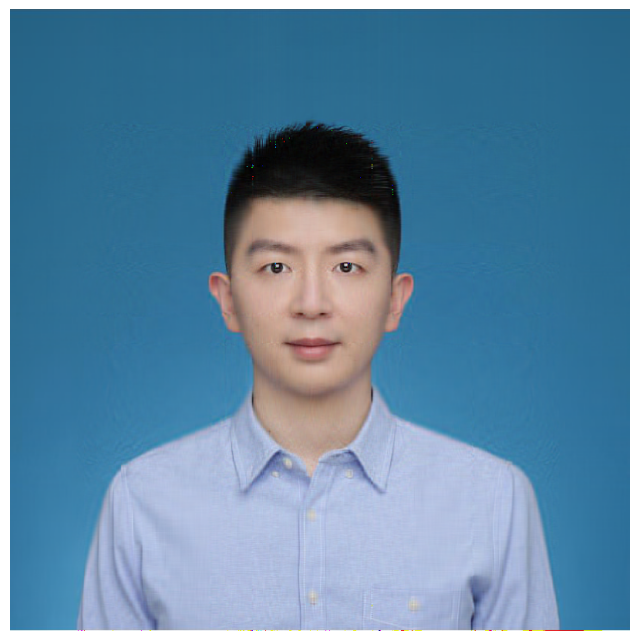

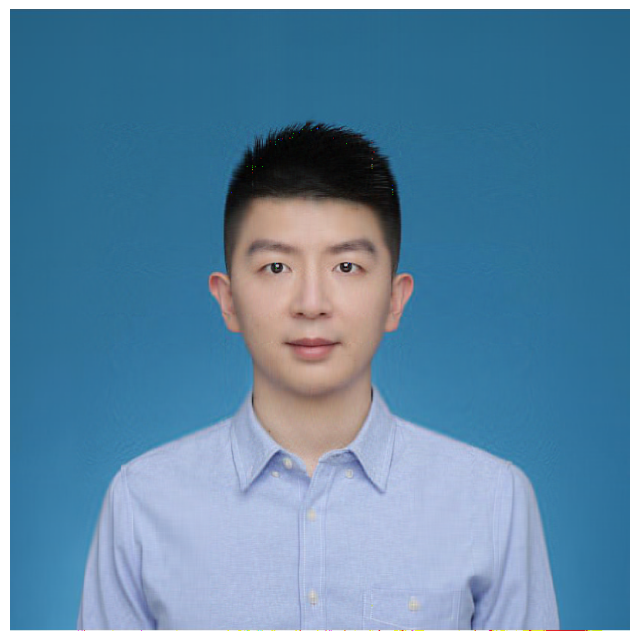

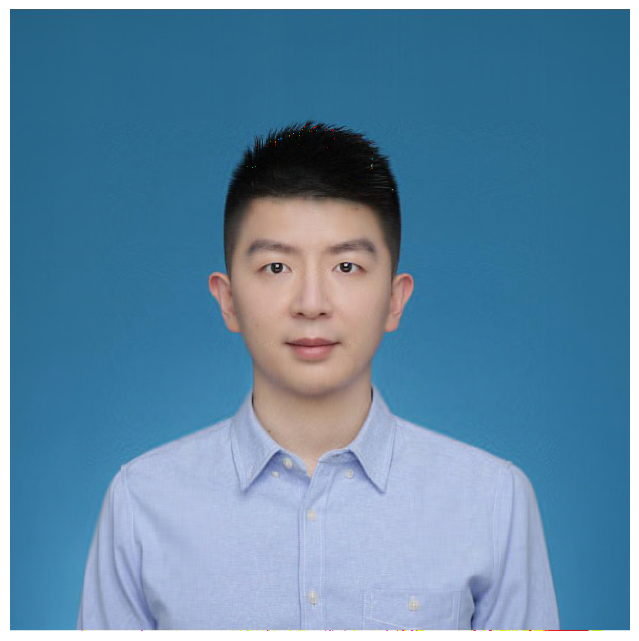

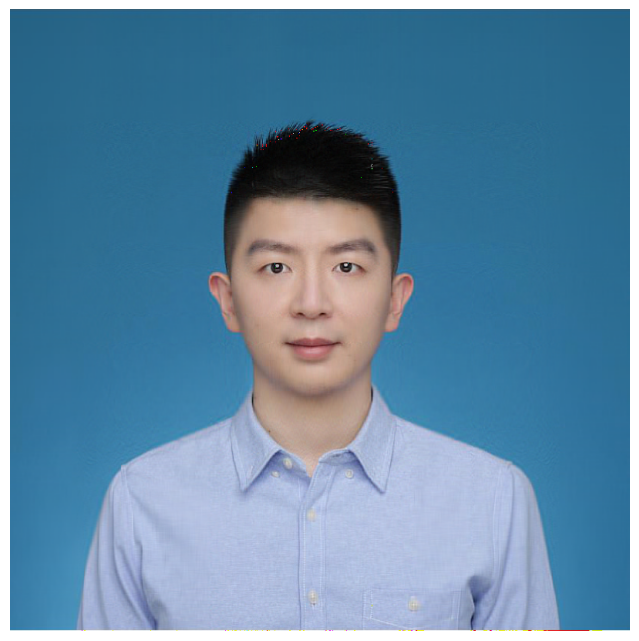

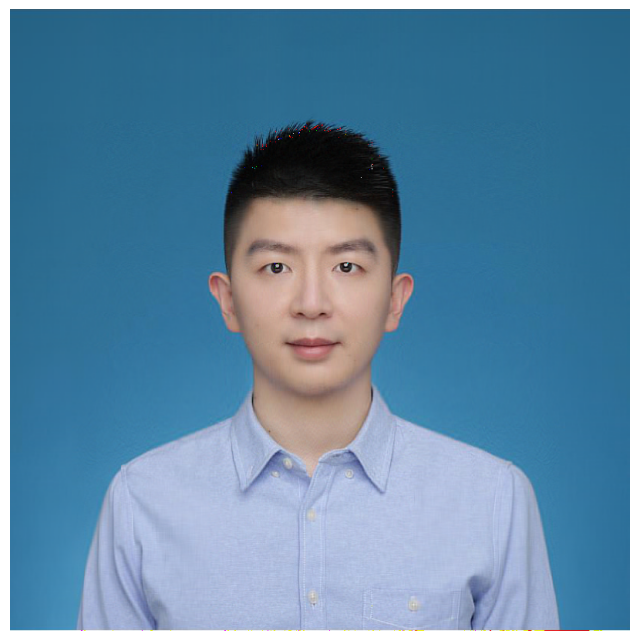

In [21]:
for r in range(1,100,10):
    svd_image = []
    for ch in range(3):
        im_ch = im[:,:,ch]
        U,D,VT = np.linalg.svd(im_ch)
        #print(U)
        #print(D)
        #print(VT)
        imx = np.matmul(np.matmul(U[:,:r],np.diag(D[:r])),VT[:r,:])
        svd_image.append(imx.astype('uint8'))
        # img[:,:,ch] = imx.astype('uint8')
    img = np.stack((svd_image[0], svd_image[1], svd_image[2]), 2)
    # print('svd_image shape:',img.shape)
    plt.figure(figsize=(800/96,1280/96), dpi=96) 
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('%02d.jpg'%r)


#### This method svd also can use to factorization matrix. But for latge matrix, the result will have some problem because the np.linalg.eig library can't get the true eigenvalue and eigenvector.

In [31]:
from scipy.linalg import schur, eigvals

In [50]:
def sortEigen(eigenvalue, eigenvector):
    index = np.argsort(-1*eigenvalue)
    eigenvalue = eigenvalue[index]
    eigenvector = eigenvector[:,index]
    return eigenvalue, eigenvector

In [64]:
# A = U E VT
def svd(a):
    #get U
    aa_left = np.dot(a, a.T)
    eigenvalue_left, eigenvector_left = np.linalg.eig(aa_left)# use a dot a.T to get a new matrix, calculate the eigenvalues and eigenvector, then eigenvector can form u
    eigenvalue_left, eigenvector_left = sortEigen(eigenvalue_left, eigenvector_left)   #get important eigenvalue
    #get V
    aa_right = np.dot(a.T, a)
    eigenvalue_right, eigenvector_right = np.linalg.eigh(aa_right)                       # use a dot a.T to get a new matrix, calculate the eigenvalues and eigenvector, then eigenvector can form v
    eigenvalue_right, eigenvector_right = sortEigen(eigenvalue_right, eigenvector_right)#get important eigenvalue
    #get Singular(E)
    Singular = eigenvalue_right
    Singular = list(map(lambda x: np.sqrt(x) if x>0 else 0, Singular))
    Singular = np.array(Singular)
    #Singular = np.diag(Singular)
    
    #r,c = np.shape(eigenvector_left)
    #r_Singular,c_Singular = np.shape(Singular)
    #for i in range(r-r_Singular):
    #    Singular = np.vstack([Singular, np.zeros(c_Singular)])
    return eigenvector_left, Singular, eigenvector_right.T
    

In [71]:
a = np.array([[5,2],[6,2]])
U,D,VT = np.linalg.svd(a)
print(U)
print(D)
print(VT)

[[-0.64819409 -0.76147516]
 [-0.76147516  0.64819409]]
[8.30313075 0.240873  ]
[[-0.94058755 -0.33955126]
 [ 0.33955126 -0.94058755]]


In [72]:
aa = np.array([[5,2],[6,2]])
UU,DD,VTT = svd(aa)
print(UU)
print(DD)
print(VTT)

[[-0.76147516 -0.64819409]
 [ 0.64819409 -0.76147516]]
[0.240873   8.30313075]
[[ 0.33955126 -0.94058755]
 [-0.94058755 -0.33955126]]
